# Honey Bee Virus Data by Sample Type
This notebook analyses data by sample type.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/bee_virus_data_cleaned.csv')

print("Number of Adult Samples: ", len(data[data["Sample Type"] == "Adult"]))
print("Number of Brood Samples: ", len(data[data["Sample Type"] == "Brood"]))
print("")
virus_columns = ['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']
for virus in virus_columns:
    data[virus] = data[virus].replace({"weak positive": "positive"})
positive_adults = data[(data["Sample Type"] == "Adult") & (data[virus_columns].apply(lambda x: x.str.contains("positive")).any(axis=1))]
positive_brood = data[(data["Sample Type"] == "Brood") & (data[virus_columns].apply(lambda x: x.str.contains("positive")).any(axis=1))]
print(f"Number of Adult Samples positive for any virus: {len(positive_adults)} ({len(positive_adults) / len(data[data['Sample Type'] == 'Adult']) * 100:.2f}%)")
print(f"Number of Brood Samples positive for any virus: {len(positive_brood)} ({len(positive_brood) / len(data[data['Sample Type'] == 'Brood']) * 100:.2f}%)")


Number of Adult Samples:  197
Number of Brood Samples:  176

Number of Adult Samples positive for any virus: 193 (97.97%)
Number of Brood Samples positive for any virus: 134 (76.14%)


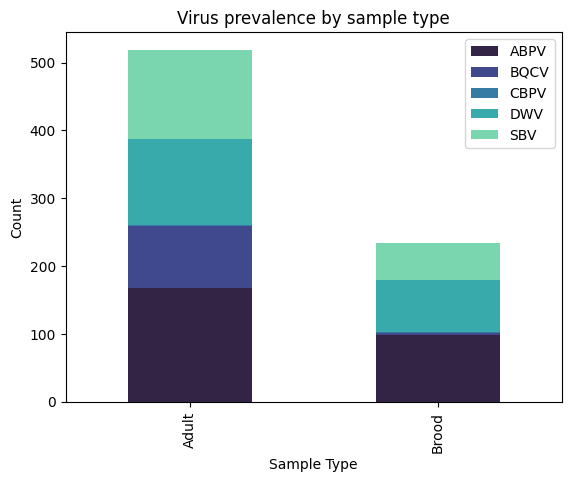

In [7]:
# Virus prevalence by sample type
virus_by_sample = data.groupby("Sample Type")[virus_columns].apply(lambda x: (x == "positive").sum())

virus_by_sample.plot(kind="bar", stacked=True, color=sns.color_palette("mako", n_colors=5))
plt.title("Virus prevalence by sample type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()